In [1]:
import sys
sys.path.append('../')
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from smodels.theory.element import Element
from smodels.particlesLoader import BSMList
from smodels.share.models.SMparticles import SMList
from smodels.theory.model import Model
from smodels.theory.tree import ParticleNode,Tree
from smodels.experiment.defaultFinalStates import finalStates
import itertools


In [2]:
slhafile = '../inputFiles/slha/lightEWinos.slha'
model = Model(BSMparticles=BSMList, SMparticles=SMList)
model.updateParticles(inputFile=slhafile, erasePrompt=['spin'])

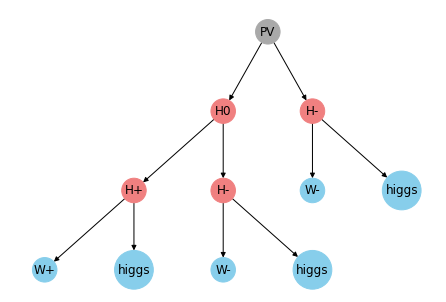

[PV, H0, H+, H-, H-, W+, W-, W-, higgs, higgs, higgs]
[(PV, H0), (PV, H-), (H0, H+), (H0, H-), (H+, W+), (H+, higgs), (H-, W-), (H-, higgs), (H-, W-), (H-, higgs)]


In [3]:
stringEla = "(PV > H0(1),H-(2)), (H0(1) > H+(3),H-(4)), (H+(3) > W+,higgs), (H-(4) > W-,higgs), (H-(2) > W-,higgs)"
ela = Element(info=stringEla,model=model)
ela.drawTree(nodeScale=3)
print(ela.tree.nodes)
print(ela.tree.edges)

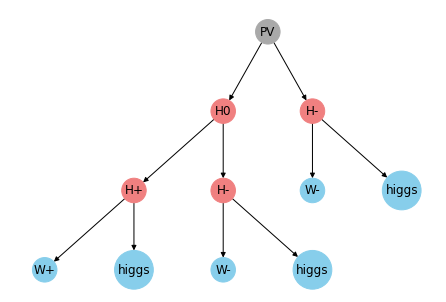

[PV, H0, H+, H-, H-, W+, W-, W-, higgs, higgs, higgs]
[(PV, H0), (PV, H-), (H0, H+), (H0, H-), (H+, W+), (H+, higgs), (H-, W-), (H-, higgs), (H-, W-), (H-, higgs)]


In [4]:
stringElb = "(PV > H0(1),H-(2)), (H-(2) > W-,higgs), (H0(1) > H-(3),H+(4)), (H-(3) > higgs,W-), (H+(4) > W+,higgs)"
elb = Element(info=stringElb,model=model)
elb.drawTree(nodeScale=3)
print(elb.tree.nodes)
print(elb.tree.edges)

In [5]:
ela == elb

True

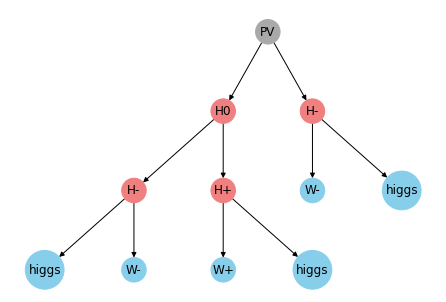

[PV, H0, H-, W-, higgs, H-, H+, higgs, W-, W+, higgs]
[(PV, H0), (PV, H-), (H0, H-), (H0, H+), (H-, W-), (H-, higgs), (H-, higgs), (H-, W-), (H+, W+), (H+, higgs)]


In [6]:
stringElb = "(PV > H0(1),H-(2)), (H-(2) > W-,higgs), (H0(1) > H-(3),H+(4)), (H-(3) > higgs,W-), (H+(4) > W+,higgs)"
elb = Element(info=stringElb,model=model,sort=False)
elb.drawTree(nodeScale=3)
print(elb.tree.nodes)
print(elb.tree.edges)

0


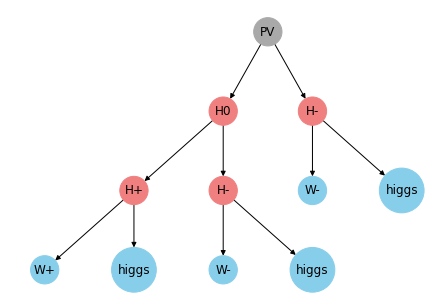

[PV, H0, H+, H-, H-, W+, W-, W-, higgs, higgs, higgs]
[PV, H0, H-, W-, higgs, H-, H+, higgs, W-, W+, higgs]
[(PV, H0), (PV, H-), (H0, H+), (H0, H-), (H+, W+), (H+, higgs), (H-, W-), (H-, higgs), (H-, W-), (H-, higgs)]
[(PV, H0), (PV, H-), (H0, H-), (H0, H+), (H-, W-), (H-, higgs), (H-, higgs), (H-, W-), (H+, W+), (H+, higgs)]


In [7]:
cmp,elMatched = elb.compareTo(ela)
print(cmp)
elMatched.drawTree()
print(elMatched.tree.nodes)
print(elb.tree.nodes)
print(elMatched.tree.edges)
print(elb.tree.edges)

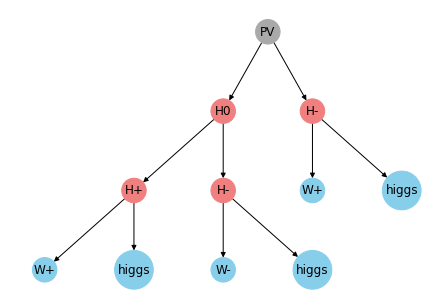

[PV, H0, H+, H-, H-, W+, W+, W-, higgs, higgs, higgs]
[(PV, H0), (PV, H-), (H0, H+), (H0, H-), (H+, W+), (H+, higgs), (H-, W+), (H-, higgs), (H-, W-), (H-, higgs)]


In [8]:
stringElc = "(PV > H0(1),H-(2)), (H-(2) > W+,higgs), (H0(1) > H-(3),H+(4)), (H-(3) > higgs,W-), (H+(4) > W+,higgs)"
elc = Element(info=stringElc,model=model)
elc.drawTree(nodeScale=3)
print(elc.tree.nodes)
print(elc.tree.edges)

In [9]:
elc == ela

False

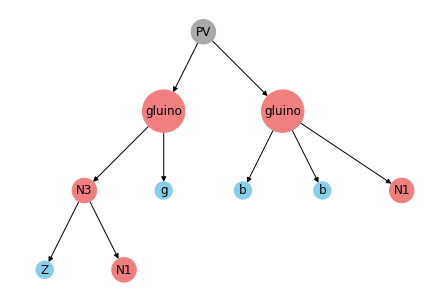

[PV, gluino, gluino, N3, g, Z, b, b, N1, N1]
[(PV, gluino), (PV, gluino), (gluino, N3), (gluino, g), (gluino, b), (gluino, b), (gluino, N1), (N3, Z), (N3, N1)]


In [10]:
stringEl = "(PV > gluino(1),gluino(2)), (gluino(1) > N1,b,b), (gluino(2) > g,N3(3)), (N3(3) > N1,Z)"
elA = Element(info=stringEl,model=model)
elA.drawTree(nodeScale=3)
print(elA.tree.nodes)
print(elA.tree.edges)

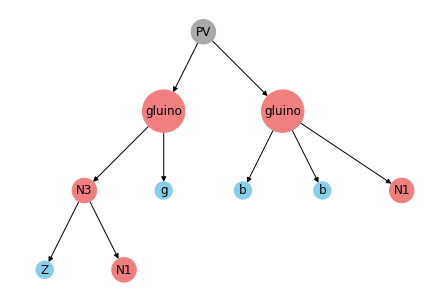

[PV, gluino, gluino, N3, g, Z, b, b, N1, N1]
[(PV, gluino), (PV, gluino), (gluino, N3), (gluino, g), (gluino, b), (gluino, b), (gluino, N1), (N3, Z), (N3, N1)]


In [11]:
stringEl = "(PV > gluino(1),gluino(2)), (gluino(1) > g,N3(3)), (gluino(2) > N1,b,b), (N3(3) > N1,Z)"
elB = Element(info=stringEl,model=model)
elB.drawTree(nodeScale=3)
print(elB.tree.nodes)
print(elB.tree.edges)

In [12]:
elA == elB

True

In [13]:
el1 = Element("(PV > anyBSM(1),anyBSM(2)), (anyBSM(1) > anyBSM(3),jet), (anyBSM(2) > anyBSM(4),jet), (anyBSM(3) > MET,Z), (anyBSM(4) > MET,W)",
             model=finalStates)
el2 = Element("(PV > anyBSM(1),anyBSM(2)), (anyBSM(1) > anyBSM(3),jet), (anyBSM(2) > anyBSM(4),jet), (anyBSM(3) > MET,W), (anyBSM(4) > MET,higgs)",
             model=finalStates)

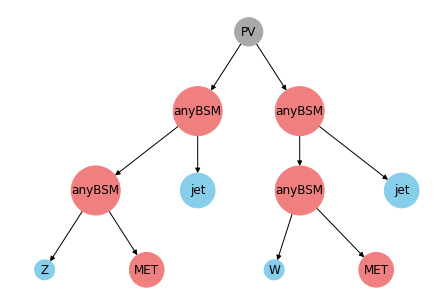

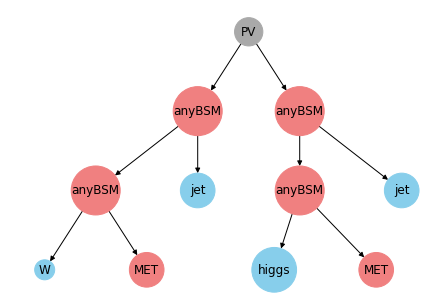

In [14]:
el1.drawTree()
el2.drawTree()

In [15]:
el1 == el2

False

In [16]:
el1 = Element("(PV > C1(1),MET), (C1(1) > anySM,MET)",model=finalStates)
el2 = Element("(PV > Hpm(1),MET), (Hpm(1) > anySM,MET)",model=finalStates)

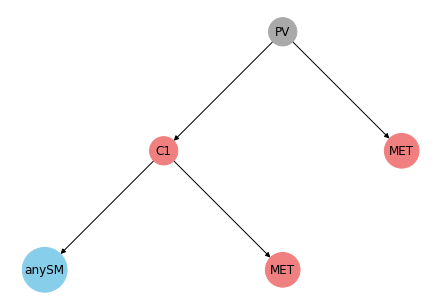

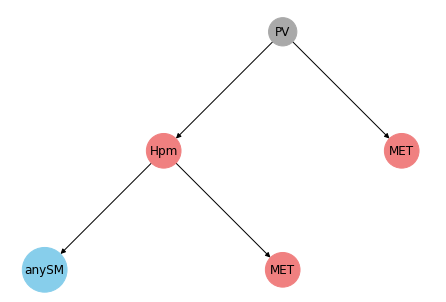

In [17]:
el1.drawTree()
el2.drawTree()

In [18]:
el1 == el2

False